In [9]:
import json
import glob
import os
from pathlib import Path
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

In [10]:
data_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m/masks')
folders = [item for item in data_root_path.iterdir() if item.is_dir()]
for folder in folders:
    print(folder)

In [47]:
!ls /root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m

gt_jsons  gt_jsons_2  images  masks  settings.json


251 385 796 695


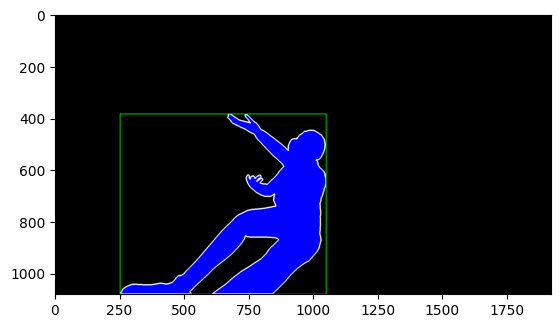

In [41]:
img = cv2.imread('/root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m/masks/mask_100000.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 75, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (255, 255, 255), 3)
x,y,w,h = cv2.boundingRect(contours[0])
print(x, y, w, h)
img = cv2.rectangle(img,(x,y),(x + w,y + h),(0,255,0),2)
imgplot = plt.imshow(img)